[FBI NICS](attachment:fbi-background-check.jpg)
<img src="fbi-background-check.jpg" alt="Drawing" style="width: 300px;"/>




# Project: An Investigation of Firearm Background Checks Using the FBI's NICS and U.S. Census Data



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project is a part of Udacity's Data Analyst Nano-Degree Program Term-1(April Cohort, 2018).

The data used in this project has been sourced from the FBI's National Instant Criminal Background Check System and the U.S. Census of 2016. These datasets have been curated by Udacity and can be viewed [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True).

According to the [FBI's official website](https://www.fbi.gov/services/cjis/nics/about-nics) the NICS is:

>Mandated by the Brady Handgun Violence Prevention Act (Brady Act) of 1993, Public Law 103-159, the National Instant Criminal Background Check System (NICS) was established for Federal Firearms Licensees (FFLs) to contact by telephone, or other electronic means, for information to be supplied immediately on whether the transfer of a firearm would be in violation of Section 922 (g) or (n) of Title 18, United States Code, or state law. The Brady Act is a public record and is available from many sources, including the Internet at www.atf.gov.

>The NICS is a national system that checks available records on persons who may be disqualified from receiving firearms. The FBI developed the system through a cooperative effort with the Bureau of Alcohol, Tobacco, Firearms and Explosives (ATF) and local and state law enforcement agencies. The NICS is a computerized background check system designed to respond instantly on most background check inquiries so the FFLs receive an almost immediate response.  In calendar year 2015, the NICS Contracted Call Centers (NCCC) handled calls an average of 141 seconds.  After transferring the calls to the NICS Section, the wait and processing time averaged 446.3 seconds.  When firearm background checks were conducted via the NICS E-Check, the wait and processing time averaged 107.5 seconds. Depending on the willingness of state governments to act as a liaison for the NICS, the FFLs contact either the FBI or a designated state point of contact (POC) to initiate background checks on individuals possessing or receiving firearms. 

Concomitantly, the U.S. Census Bureau's [website](https://www.census.gov/about/who.html) states:

>The U.S. Census Bureau has been headquartered in Suitland, Md. since 1942, and currently employs about 4,285 staff members. The Census Bureau is part of the U.S. Department of Commerce. The U.S. Census Bureau is overseen by the Economics and Statistics Administration (ESA) within the Department of Commerce. The Economics and Statistics Administration provides high-quality economic analysis and fosters the missions of the U.S. Census Bureau and the Bureau of Economic Analysis.

Prior to conducting our investigation, it must be highlighted that the information accompanying the datasets provided by the FBI clearly state that the statistics represented in the number of firearm background checks in the NICS do not represent the number of firearms sold based on varying state laws and purchase scenarios. **Therefore, a one-to-one correlation _cannot_ be made between a firearm background check and a firearm sale.** These checks can, however, provide a safe estimation of gun sales in the U.S.

### Questions Explored in the Project:

**Q1. Which states have the highest guns per capita, both in 2010 and 2016. Also, contrast the top 5 states of 2016 with their data from 2010.**

**Q2. Is there a correlation between the number of veterans and guns per capita (as of 2016)?**

**Q3. What is the overall yearly trend of gun purchases / FBI background checks in the US?**

**Q4. Which states have the highest gun registration rates from 2010 and 2016?**

**Q5. How many checks have there been in each state since November, 1998 in every state?**




Let us begin by importing the necessary Python packages and initializing _matplotlib inline_.

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
% matplotlib inline
sns.set_style('darkgrid')
pd.set_option('precision', 5)


<a id='wrangling'></a>
## Data Wrangling 

First, we need to load the necessary .csv files into their respective DataFrames. The FBI NICS data will be loaded in "df_gun_data" and the U.S. Census data will be loaded in "df_census".

### 1. Loading files into Dataframes and checking for cleanliness

In [245]:
df_census = pd.read_csv('U.S. Census Data.csv')
df_gun_data = pd.read_csv('gun_data.csv')

#### 1a. Checking the FBI Gun Data DataFrame

First, we will check the 'gun_data' data frame for cleanliness and readability as well as for its data types and various column and row names.

In [246]:
# Displaying information from the the gun_data dataframe
df_gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [247]:
df_gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

**NOTE:** Here, we can observe that the number of guns in all columns except totals is a float type. We will change the values showing integer types to float in the data cleaning section to ensure uniformity of data types in our analysis.

Also, we will need to split the "month" column into separate columns for both months and years for certain sections further on in the analysis.

In [248]:
#Checking columns and rows
print("The dimensions of the gun data DataFrame are: ")
df_gun_data.shape

The dimensions of the gun data DataFrame are: 


(12485, 27)

In [249]:
#Checking for duplicate values
df_gun_data.duplicated().sum()

0

In [250]:
#Checking for null values
df_gun_data.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

**NOTE:** When addressing the issue of removing null values in this DataFrame, we must remember to replace these values  with the column means in the DataFrame, in order to get a relatively accurate picture of gun sales/ FBI bakground checks.

In [251]:
# Checking for unique values
df_gun_data.nunique()

month                          227
state                           55
permit                        5390
permit_recheck                 168
handgun                       7381
long_gun                      8350
other                         1226
multiple                      1387
admin                          499
prepawn_handgun                 90
prepawn_long_gun               133
prepawn_other                   16
redemption_handgun            1893
redemption_long_gun           2370
redemption_other                47
returned_handgun               237
returned_long_gun              113
returned_other                  34
rentals_handgun                  9
rentals_long_gun                 8
private_sale_handgun           152
private_sale_long_gun          136
private_sale_other              43
return_to_seller_handgun        17
return_to_seller_long_gun       17
return_to_seller_other           5
totals                       10218
dtype: int64

#### 1b. Checking the Census DataFrame

Now, we will display information about the Census data frame while checking it for cleanliness and readability

In [252]:
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


**NOTE:** The df_census DataFrame provides a much larger dataset and also contains information which isn't relevent to this particular investigation. Also, the DataFrame will need to be transposed during the cleaning section of this report, to aide in our analysis.

Therefore, once transposed, the columns containing data from 2010 and 2016, as well as the data on veterans shall be retained and other columns, including 'Fact Note' will be dropped.


In [253]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

**NOTE:** In its current form, the df_census DataFrame's columns, which contain variable data of different U.S. states, are in a string format and must be converted to float in the data cleaning section before we can conduct our exploratory analysis.



In [254]:
print("The dimensions of the census DataFrame are: ")
df_census.shape

The dimensions of the census DataFrame are: 


(85, 52)

In [255]:
# Checking for duplicate values
df_census.duplicated().sum()

3

In [256]:
# Checking for null values
df_census.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [257]:
#Checking for unique values
df_census.nunique()

Fact              80
Fact Note         15
Alabama           65
Alaska            64
Arizona           64
Arkansas          64
California        63
Colorado          64
Connecticut       63
Delaware          64
Florida           64
Georgia           64
Hawaii            63
Idaho             63
Illinois          65
Indiana           63
Iowa              65
Kansas            65
Kentucky          65
Louisiana         65
Maine             64
Maryland          64
Massachusetts     65
Michigan          64
Minnesota         65
Mississippi       65
Missouri          64
Montana           65
Nebraska          65
Nevada            63
New Hampshire     65
New Jersey        65
New Mexico        64
New York          65
North Carolina    65
North Dakota      63
Ohio              64
Oklahoma          64
Oregon            63
Pennsylvania      65
Rhode Island      64
South Carolina    65
South Dakota      65
Tennessee         64
Texas             64
Utah              64
Vermont           63
Virginia     

<a id='cleaning'></a>
### 2. Cleaning the DataFrames

We will now proceed with cleaning the data prior to our exploratory analysis.

#### 2a. Cleaning the Gun Data DataFrame

As noted earlier, during this process we will need to:

1. Fill the missing, or null, values in the df_gun_data DataFrame with mean values in order to increase the accuracy of our dataset.

2. Additionally, we will also be adding columns for "months" and "year" by splitting up the primary "month" column so that we may use these values in parts of our analysis later on.

3. Assure that all column datatypes are float type.

In [258]:
#Replacing Null values in Gun Data dataframe with the mean of each column.
#NOTE Check whether to change the gun data from mean to sum
df_gun_data.fillna(df_gun_data.mean(), axis=0, inplace=True)

In [259]:
#Checking gun data following fillna
df_gun_data.isnull().sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

**NOTE:** All null values have been removed. Now we shall proceed with splitting the "month" column.

In [260]:
# Extracting year and month from the 'month' column and assigning values to separate columns.
df_gun_data['year'] = df_gun_data['month'].apply(lambda x: x.split("-")[0]).astype(np.int64)

df_gun_data['months'] = df_gun_data['month'].apply(lambda x: x.split("-")[1]).astype(np.int64)



In [261]:
# Verifying changes
df_gun_data.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017,9


**NOTE:** Now we can change the data type of the selected columns below to float.

In [106]:
df_gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 29 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12485 non-null float64
permit_recheck               12485 non-null float64
handgun                      12485 non-null float64
long_gun                     12485 non-null float64
other                        12485 non-null float64
multiple                     12485 non-null int64
admin                        12485 non-null float64
prepawn_handgun              12485 non-null float64
prepawn_long_gun             12485 non-null float64
prepawn_other                12485 non-null float64
redemption_handgun           12485 non-null float64
redemption_long_gun          12485 non-null float64
redemption_other             12485 non-null float64
returned_handgun             12485 non-null float64
returned_long_gun            12485 non-null float64
returned_ot

In [262]:
# Creating list of columns to change to integer.
gun_cols = ['multiple', 'totals', 'year', 'months']

In [263]:
# Changing data type to integer
df_gun_data[gun_cols] = df_gun_data[gun_cols].applymap(np.float64)

In [264]:
# Verifying the changes to the gun dataframe
df_gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 29 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12485 non-null float64
permit_recheck               12485 non-null float64
handgun                      12485 non-null float64
long_gun                     12485 non-null float64
other                        12485 non-null float64
multiple                     12485 non-null float64
admin                        12485 non-null float64
prepawn_handgun              12485 non-null float64
prepawn_long_gun             12485 non-null float64
prepawn_other                12485 non-null float64
redemption_handgun           12485 non-null float64
redemption_long_gun          12485 non-null float64
redemption_other             12485 non-null float64
returned_handgun             12485 non-null float64
returned_long_gun            12485 non-null float64
returned_

**NOTE:** Now that the DataFrame has been cleaned, we can save it in a new DataFrame by the name of "gun_clean". This new DataFrame will be used in the rest of our analysis.

In [265]:
# Saving to new data frame
gun_clean = df_gun_data

# Verifying
gun_clean.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317.0,0.0,15.0,...,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019.0,2017.0,9.0
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160.0,0.0,5.0,...,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303.0,2017.0,9.0
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631.0,0.0,13.0,...,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394.0,2017.0,9.0
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366.0,51.0,12.0,...,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747.0,2017.0,9.0
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506.0,2017.0,9.0


#### b. Cleaning the Census DataFrame

Here, we shall proceed with the cleaning of the "df_census" DataFrame.

The key aspects of this process are:

1. Dropping extraneous rows from the current DataFrame and keeping those rows which have population totals for 2010 and 2016 (extraneous rows are the ones containing percentage values and various references)
2. Removing unnecessary characters from the column names.
3. Converting the columns containing state-wise data into float datatypes since alot of the data is in percentages.
4. Transpose the DataFrame, set a new index and save the changes.

In [266]:
# Dropping the column 'Fact Note'
df_census.drop('Fact Note', axis=1, inplace=True)

In [267]:
#Dropping the bottom rows not pertinent to our analysis
df_census.drop([2], inplace=True)

In [268]:
df_census.drop(df_census.index[20:84], inplace=True)

In [269]:
df_census.drop(df_census.index[3:19], inplace=True)

In [270]:
# Removing the characters '(V2016)' from the 'Fact' Column
df_census['Fact'] = df_census['Fact'].map(lambda x: x.replace(',  (V2016)', ''))

In [271]:
# Verifying changes made to the dataframe
df_census

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
20,"Veterans, 2011-2015","363,170","69,323","505,794","220,953","1,777,410","391,725","199,331","71,213","1,507,738",...,63742,462414,"1,539,655","134,332","44,708","706,539","564,864","150,021","381,940","48,505"


**NOTE:** Once the extraneous rows have been dropped and unnecessary strings such as _'(V2016)'_ have been dropped from the column names, we can proceed with converting the data types of the columns as well as transposing the DataFrame while assigning the column _'Fact'_ as the new index.

We will also assign the state names to a new column to further increase clarity.

In [272]:
# Defining states for conversion to float
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
          'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',  
          'Hawaii', 'Idaho', 'Illinois','Indiana', 'Iowa', 'Kansas', 
          'Kentucky', 'Louisiana', 'Maine','Maryland', 'Massachusetts', 
          'Michigan','Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
          'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
          'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon','Pennsylvania', 
          'Rhode Island', 'South Carolina','South Dakota', 'Tennessee', 'Texas', 'Utah', 
          'Vermont','Virginia', 'Washington', 'West Virginia','Wisconsin', 'Wyoming']

In [273]:
# Removing all the 'non-digit' objects and converting them to integer type.
for state in states:
    df_census[state].replace(regex=True, inplace=True, to_replace=r'\D', value=r'')
    df_census[state] = pd.to_numeric(df_census[state], downcast='float', errors='ignore')

In [274]:
# Verifying Changes
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 20
Data columns (total 51 columns):
Fact              4 non-null object
Alabama           4 non-null float32
Alaska            4 non-null float32
Arizona           4 non-null float32
Arkansas          4 non-null float32
California        4 non-null float32
Colorado          4 non-null float32
Connecticut       4 non-null float32
Delaware          4 non-null float32
Florida           4 non-null float32
Georgia           4 non-null float32
Hawaii            4 non-null float32
Idaho             4 non-null float32
Illinois          4 non-null float32
Indiana           4 non-null float32
Iowa              4 non-null float32
Kansas            4 non-null float32
Kentucky          4 non-null float32
Louisiana         4 non-null float32
Maine             4 non-null float32
Maryland          4 non-null float32
Massachusetts     4 non-null float32
Michigan          4 non-null float32
Minnesota         4 non-null float32
Mississippi

In [275]:
# Setting 'Fact' as the index
df_census.set_index('Fact', inplace=True)

In [276]:
# Transpose census data and remove index on 'Fact'
census_transpose = df_census.T.reset_index()

In [277]:
# Rename the column name from index to state to match the column names in gun data
census_transpose.rename(columns={'index': 'state'}, inplace=True)
census_transpose.dropna(axis=1, inplace=True)

In [278]:
# Changing all columns to lower case for consistency
census_transpose.columns = census_transpose.columns.str.lower()

In [279]:
# Replacing commas and spaces with underscore
census_transpose.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
census_transpose.rename(columns=lambda x: x.strip().replace(",",""), inplace=True)

In [280]:
# Verifying changes made to the dataframe
census_transpose.head()

Fact,state,population_estimates_july_1_2016,population_estimates_base_april_1_2010,population_census_april_1_2010,veterans_2011-2015
0,Alabama,4863300.0,4780131.0,4779736.0,363170.0
1,Alaska,741894.0,710249.0,710231.0,69323.0
2,Arizona,6931071.0,6392301.0,6392017.0,505794.0
3,Arkansas,2988248.0,2916025.0,2915918.0,220953.0
4,California,39250016.0,37254520.0,37253956.0,1777410.0


In [283]:
census_transpose.duplicated().sum()

0

Now that we have completed the cleaning section of this report, the next step will be to begin with our Exploratory Data Analysis Section.

<a id='eda'></a>
## Exploratory Data Analysis 

Before we begin addressing the questions mentioned in the introductory section of our report, lets begin by printing and observing the summarized descriptive statistics for the cleaned gun data and transposed census Dataframes. Then we will generate a basic histogram matrix for the aforementioned, so that we can get a glimpse of the various distributions of the data we're about to analyze.

In [284]:
# Prelimnary analysis of Gun Data
gun_clean.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
count,12485.00000,12485.00000,12485.00000,12485.00000,12485.00000,12485.00000,12485.00000,12485.00000,12485.00000,12485.00000,...,12485.00000,12485.0000,12485.00000,12485.00000,12485.00000,12485.00000,12485.00000,12485.00000,12485.00000,12485.00000
mean,6413.62940,1165.95636,5940.88111,7810.84759,360.47164,268.60336,58.89809,4.82802,7.83416,0.16559,...,0.08727,14.9360,11.60291,1.03018,0.40202,0.44182,0.10599,21595.72591,2007.79295,6.48458
std,23729.49582,2736.84817,8611.67759,9302.75889,895.63463,783.18507,604.25742,10.02304,15.13089,0.67658,...,0.17256,33.4186,25.45863,2.09657,0.64396,0.71713,0.18159,32591.41839,5.46830,3.45194
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1998.00000,1.00000
25%,0.00000,1165.95636,868.00000,2079.00000,163.00000,15.00000,0.00000,0.00000,0.00000,0.00000,...,0.08727,14.9360,11.60291,1.03018,0.40202,0.44182,0.10599,4638.00000,2003.00000,3.00000
50%,522.00000,1165.95636,3067.00000,5130.00000,360.47164,125.00000,0.00000,1.00000,3.00000,0.16559,...,0.08727,14.9360,11.60291,1.03018,0.40202,0.44182,0.10599,12399.00000,2008.00000,6.00000
75%,4338.00000,1165.95636,7277.00000,10374.00000,360.47164,301.00000,0.00000,4.82802,7.83416,0.16559,...,0.08727,14.9360,11.60291,1.03018,0.40202,0.44182,0.10599,25453.00000,2013.00000,9.00000
max,522188.00000,116681.00000,107224.00000,108058.00000,77929.00000,38907.00000,28083.00000,164.00000,269.00000,49.00000,...,12.00000,1017.0000,777.00000,71.00000,28.00000,17.00000,4.00000,541978.00000,2017.00000,12.00000


**NOTE:** As we can see, the average number of background checks between 1998 and 2017 is approximately **21,595**. The highest number of checks conducted in a month was **541,978**. Also, there were, on average, approximately, **5941** checks per month for hand guns, **7811** checks for long guns, **360** and **269** checks for "other"  and "multiple" types of weapons respectively.

The various distributions are displayed below, where our attention is drawn to the "months" histogram. In this, we can observe that a large proportion of the background checks takes place around the end and the beginning of the year i.e. November to January.

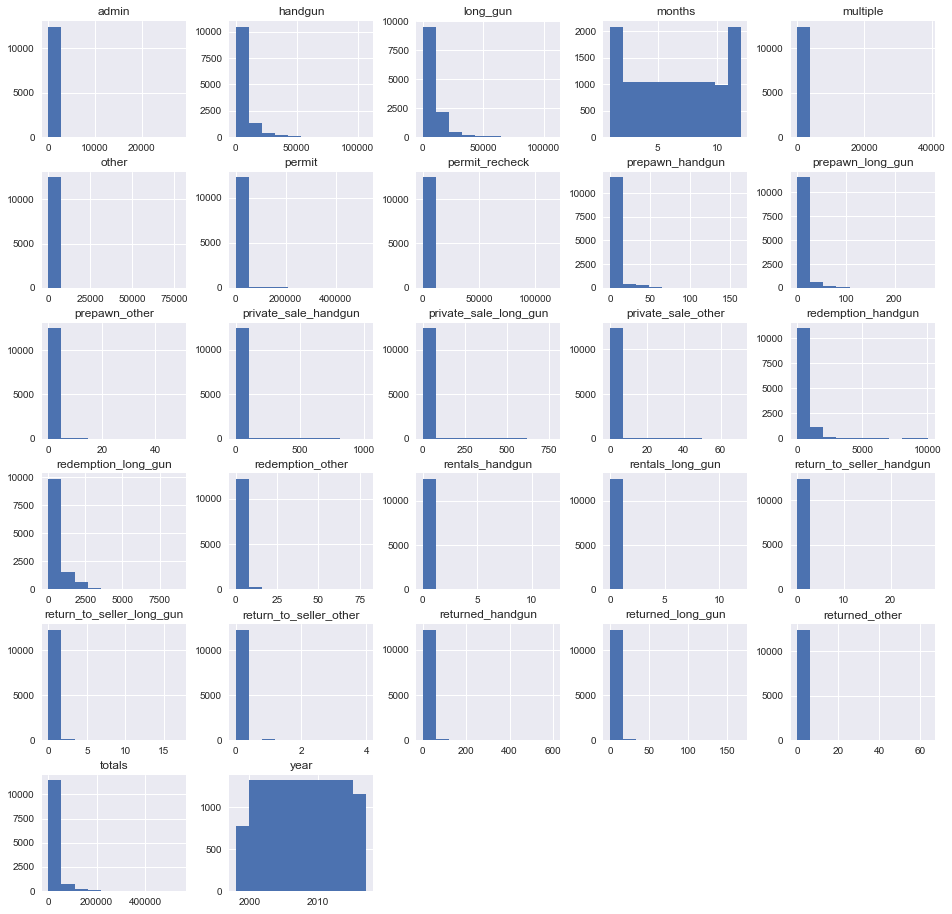

In [285]:
# Generating histograms for gun_clean
gun_clean.hist(figsize=(16,16));

In [286]:
census_transpose.describe()

Fact,population_estimates_july_1_2016,population_estimates_base_april_1_2010,population_census_april_1_2010,veterans_2011-2015
count,5.00000e+01,5.00000e+01,5.00000e+01,50.0
mean,6.44893e+06,6.16313e+06,6.16288e+06,401594.0
std,7.27177e+06,6.84846e+06,6.84824e+06,383158.5
min,5.85501e+05,5.63767e+05,5.63626e+05,44708.0
25%,1.85011e+06,1.83300e+06,1.83300e+06,133271.5
50%,4.55932e+06,4.43641e+06,4.43637e+06,302017.5
75%,7.19877e+06,6.68036e+06,6.68031e+06,494949.0
max,3.92500e+07,3.72545e+07,3.72540e+07,1777410.0


From the descriptive statistics generated for the "census_tranpose" DataFrame, we can observe that the average populations per state for 2010 and 2016 are **6,163,127** and **6,448,928** respectively. As per the latest population estimates for 2016, the lowest recorded population is **585,501** and the highest recorded population is **39,250,016**.

The histograms generated below indicate that the population estimates and the number of veterans are all right skewed, with outliers present in all histograms which are consistent with the maximum values displayed above.

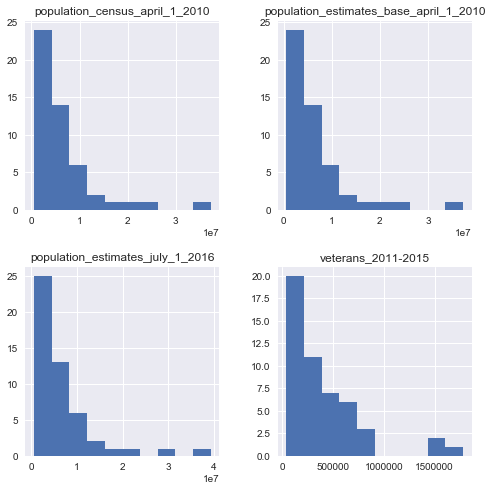

In [287]:
# Generating histograms for census_tranpose
census_transpose.hist(figsize=(8,8));

### Q1. Which states have the highest number of guns per capita, both in 2010 and 2016? 

In order to address this question, we will begin by grouping the totals for background checks by year i.e. 2010 and 2016. Then the totals will be grouped according to states in separate DataFrames. Once this is done, we will merge the newly generated DataFrames first with each other, and then with "census_transpose", resulting in a final DataFrame called "result" which will form the basis for the rest of our analyses. 

In [288]:
# Create subsets of gun totals by year
gun_10 = gun_clean[gun_clean['year'] == 2010]
gun_16 = gun_clean[gun_clean['year'] == 2016]

In [289]:
# Get subset data for 2016 and 2010
gun_total_10 = gun_10.groupby(['state'])['totals'].sum().reset_index()
gun_total_16 = gun_16.groupby(['state'])['totals'].sum().reset_index()

In [290]:
# Rename the dataset to represent different time points
gun_total_10.rename(columns={'totals': 'totals_2010'}, inplace=True)
gun_total_16.rename(columns={'totals': 'totals_2016'}, inplace=True)

In [291]:
gun_merge_list = [gun_total_10, gun_total_16]

In [292]:
# Merging the gun totals from 2010 and 2016, can be used for additional merges
gun_merged = reduce(lambda left,right: pd.merge(left,right,on='state'), gun_merge_list)
gun_merged.head(2)

,state,totals_2010,totals_2016
0,Alabama,308607.0,616947.0
1,Alaska,65909.0,87647.0


In [293]:
# Merge gun and census data according to state column
result = gun_merged.merge(census_transpose, on='state', how='inner')
result.head(2)

,state,totals_2010,totals_2016,population_estimates_july_1_2016,population_estimates_base_april_1_2010,population_census_april_1_2010,veterans_2011-2015
0,Alabama,308607.0,616947.0,4863300.0,4780131.0,4779736.0,363170.0
1,Alaska,65909.0,87647.0,741894.0,710249.0,710231.0,69323.0


Following the calculations and merges above, we will now calculate the amount of guns per capita (per 100,000 people) for each state using the population data from 2010 and 2016.

In [294]:
# Calculate the guns per capita for 2010
result['gun_per_capita_2010'] = (result['totals_2010'] / result['population_estimates_base_april_1_2010'])*100000

In [295]:
# Calculate guns per capital for 2016
result['gun_per_capita_2016'] = (result['totals_2016'] / result['population_estimates_july_1_2016'])*100000

Now, we can display the top 5 states with the highest guns per capita and generate bar plots to view the results.

In [296]:
# Top 5 in 2010 and rounding off the results
top_5_2010 = result.nlargest(5, 'gun_per_capita_2010').round()
top_5_2010[['state', 'totals_2010', 'gun_per_capita_2010']]

,state,totals_2010,gun_per_capita_2010
16,Kentucky,2385579.0,54976.0
43,Utah,553134.0,20013.0
25,Montana,101095.0,10218.0
1,Alaska,65909.0,9280.0
47,West Virginia,159550.0,8610.0


In [297]:
width = 0.45 #Setting the width of the bars for plotting

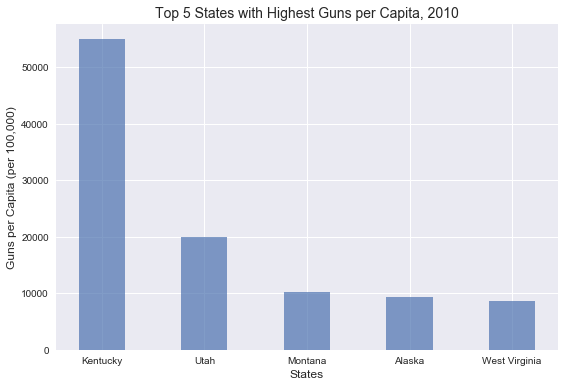

In [298]:
#First plot for guns per capita in 2010

fig, ax = plt.subplots(figsize=(9,6))
plt.bar(top_5_2010['state'],top_5_2010['gun_per_capita_2010'], width, alpha=.7)
plt.title("Top 5 States with Highest Guns per Capita, 2010", fontsize=14)
plt.xlabel("States", fontsize=12)
plt.ylabel("Guns per Capita (per 100,000)", fontsize=12)
ax.tick_params(axis='both', labelsize=10)

The results of this plot show that Kentucy had the highest guns per capita in the United States - i.e. approximately **55,000** - guns per 100,000 people. The second highest value is of Utah, with approximately **20,000** guns per 100,000, followed by Montana, Alaska and West Virginia with approximately **10,000**, **9300** and **8600** respectively.

Now we will calculate the top 5 states with highest guns per capita for 2016. Once we plot the results of this analysis, we will also contrast the states with the highest guns per capita for 2016 with their results from 2010 to get an idea of growth of guns in those states.

In [299]:
# Top 5 states according to highest gun per capital in 2016
top_5_2016 = result.nlargest(5, 'gun_per_capita_2016').round()
top_5_2016[['state', 'totals_2010', 'totals_2016', 'gun_per_capita_2016']]

,state,totals_2010,totals_2016,gun_per_capita_2016
16,Kentucky,2385579.0,3676847.0,82868.0
13,Indiana,345650.0,1436725.0,21660.0
12,Illinois,695300.0,1924070.0,15030.0
47,West Virginia,159550.0,242350.0,13235.0
25,Montana,101095.0,136337.0,13078.0


In [300]:
ind = np.arange(len(top_5_2016['state'])) #The x locations for the groups


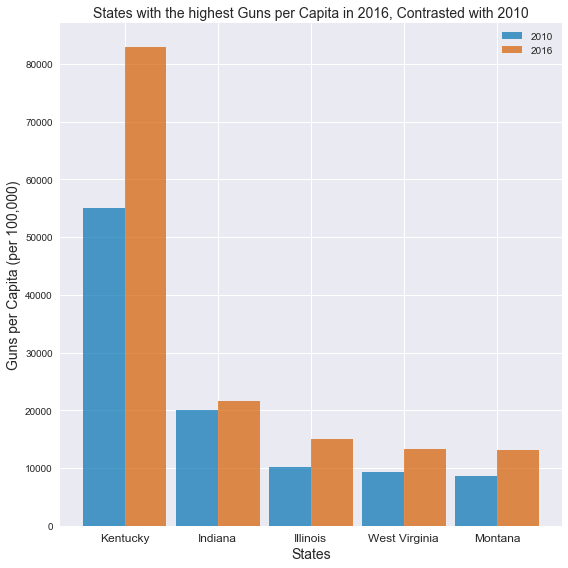

In [301]:
# Plotting the results and contrasting with 2010 values

fig, ax = plt.subplots(figsize=(8,8))
plt.style.use('seaborn')
opacity = 0.7
error_config = {'ecolor': '0.3'}

bars_2010 = ax.bar(ind, top_5_2010['gun_per_capita_2010'], width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='2010')

bars_2016 = ax.bar(ind + width, top_5_2016['gun_per_capita_2016'], width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='2016')

labels = top_5_2016['state']
ax.set_xlabel('States', fontsize = 14)
ax.set_ylabel('Guns per Capita (per 100,000)', fontsize=14)
ax.set_title('States with the highest Guns per Capita in 2016, Contrasted with 2010', fontsize=14)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels, fontsize=12)
ax.legend()

fig.tight_layout()
plt.show()


Here, we can clearly observe a significant increase in Kentucky's guns per capita per 100,000 people - which still happens to be the state with the most amount of guns per capita - to approximately **83,000**. Additionally, Indiana and Illinois overtook Utah and Montana, with the second and third highest guns per capita in 2016 with approximately **22,000*** and **15,000** guns per 100,00 people respectively. West Virginia and Montana also witnessed an increase to  **13,300** and **13,000** guns per 100,000 people respectively.

### Q2. Is there any correlation between the number of veterans and guns per capita (as of 2016)?

In order to answer this question, we will display the relevant states along with the column for number of veterans (as of 2011-2015) and the number of guns per capita for 2016 (per 100,000 people). The results will be sorted in a descending order according to the number of veterans column.

In [302]:
result[['state', 'veterans_2011-2015', 'gun_per_capita_2016']].sort_values(ascending=False, by='veterans_2011-2015').round()

,state,veterans_2011-2015,gun_per_capita_2016
4,California,1777410.0,6056.0
42,Texas,1539655.0,6179.0
8,Florida,1507738.0,6963.0
37,Pennsylvania,870770.0,8942.0
31,New York,828586.0,2050.0
34,Ohio,806531.0,7540.0
45,Virginia,706539.0,6281.0
32,North Carolina,696119.0,5927.0
9,Georgia,670617.0,5945.0
12,Illinois,668933.0,15030.0


The selected columns from the data frame don't seem to indicate a positive correlation between the two variables. We can clearly observe that California, with the largest population of veterans i.e. **1,777,410**, does not have as many guns per capita - i.e. **6056** - when compared to Kentucky, which has already been established as the state with the highest guns per capita but a relatively low number of veterans - i.e. **297,312**.  

We can proceed with generating a scatter plot to clarify the matter.

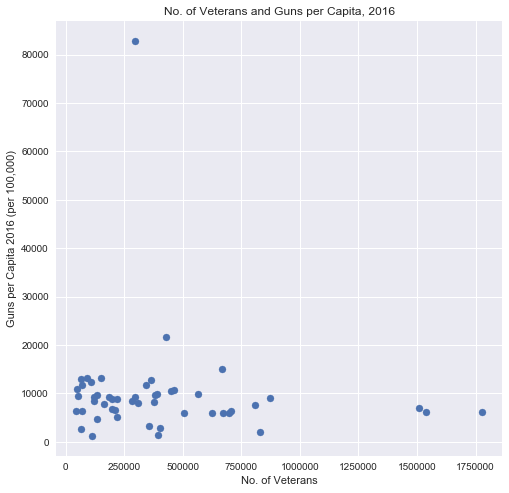

In [303]:
plt.figure(figsize=(8,8))
plt.style.use('seaborn')
plt.scatter(result['veterans_2011-2015'], result['gun_per_capita_2016'])
plt.title("No. of Veterans and Guns per Capita, 2016")
plt.xlabel("No. of Veterans")
plt.ylabel("Guns per Capita 2016 (per 100,000)");

There appears to be no direct correlation given the clustering in the scatterplot. However, it must also be acknowledged that veterans make up a small percentage of the overall population and thus this plot does not take into account the high number of guns per capita for veterans alone. A 2015 [study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5735043/) by the National Institute of Health states:

>The current study is the first to examine firearm ownership among a nationally representative sample of veterans of the United States Armed Forces. It is also the first to provide details regarding the characteristics of veteran gun owners, the reasons they own their firearms, and the type, number, and distribution of their firearms. Our study shows that veterans own firearms more commonly (45%) than do non-veterans (20%) in the general population.

>This difference is more pronounced among females than among males, with approximately one in four female veterans owning guns (compared with one in nine non-veteran females), and one in two male veterans owning guns, compared with one in three male non-veterans.

Thus, we can infer that there is be no direct correlation between the number of veterans in a state and the guns per capita for the total population, even if veterans are more likely to have one or more firearms.

## Q3. What is the overall yearly trend of gun purchases  / FBI background checks in the US?

For this analysis, we will use the value of the original "month" column to get a better idea about the trends of gun purchases in the US. We will calculate both the mean trends and the total trends since November 1998.

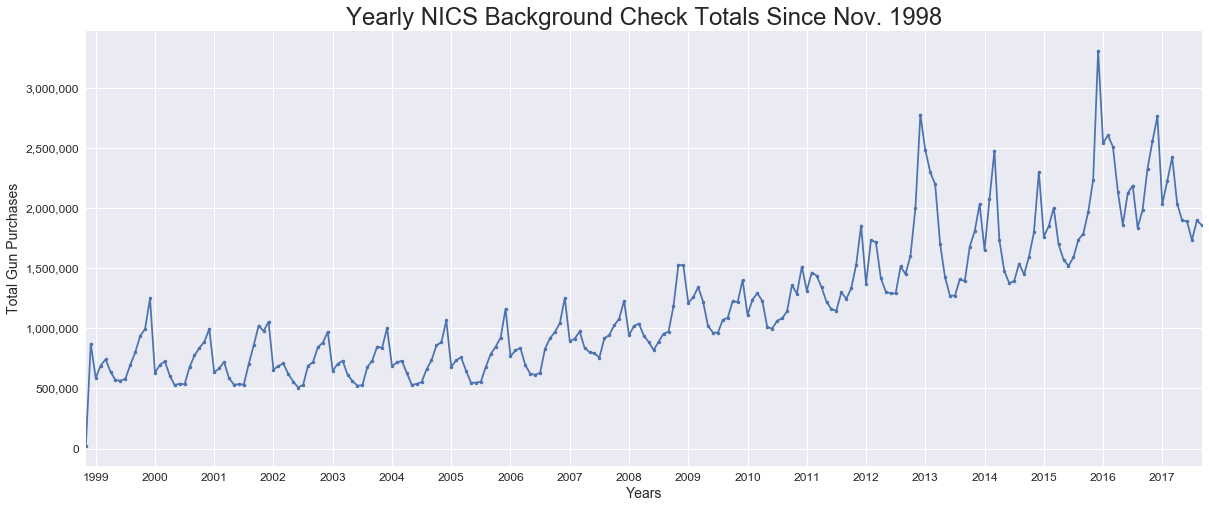

In [304]:
# sum the totals by month
total_trend = gun_clean.groupby("month")["totals"].sum()

# plot graph
tick_placement = pd.np.arange(2, len(total_trend), 12)
plt.style.use('seaborn')
ax = total_trend.plot(figsize=(20,8), marker='.')


ax.set_title("Yearly NICS Background Check Totals Since Nov. 1998", fontsize=24)
ax.set_yticklabels([ "{0:,.0f}".format(y) for y in ax.get_yticks() ], fontsize=12);
plt.setp(ax.get_xticklabels(), rotation=0, fontsize=12)
ax.set_xticks(tick_placement)
ax.set_xticklabels([ total_trend.index[i].split("-")[0] for i in tick_placement ])
ax.set_xlim(0, len(total_trend) - 1)
ax.set_xlabel("Years", fontsize=14)
ax.set_ylabel("Total Gun Purchases", fontsize=14);

Now, we will plot the trend for mean values of background checks.

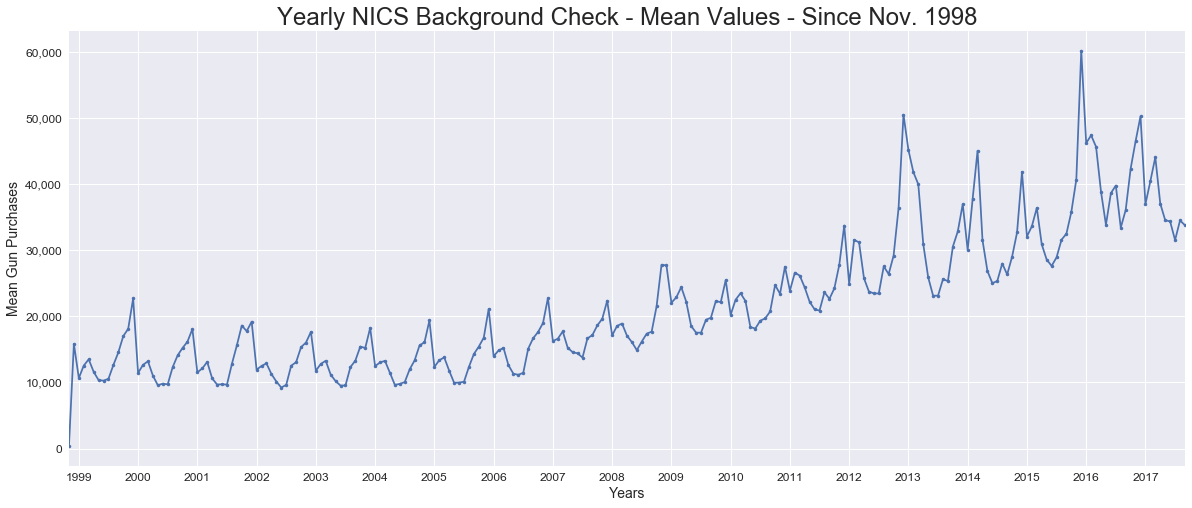

In [305]:
# sum the totals by month
mean_trend = gun_clean.groupby("month")["totals"].mean()

# plot graph
plt.style.use('seaborn')
ax2 = mean_trend.plot(figsize=(20,8), marker='.')


ax2.set_title("Yearly NICS Background Check - Mean Values - Since Nov. 1998", fontsize=24)
ax2.set_yticklabels([ "{0:,.0f}".format(y) for y in ax2.get_yticks() ], fontsize=12);
plt.setp(ax2.get_xticklabels(), rotation=0, fontsize=12)
ax2.set_xticks(tick_placement)
ax2.set_xticklabels([ mean_trend.index[i].split("-")[0] for i in tick_placement ])
ax2.set_xlim(0, len(mean_trend) - 1)
ax2.set_xlabel("Years", fontsize=14)
ax2.set_ylabel("Mean Gun Purchases", fontsize=14);

This visualization shows an exponential increase in background checks since 1998. Each spike shows that gun sales greatly increase in December of each year. The greatest spike being in 2015 due to Black Friday sales. In an article from the [The Guardian](https://www.theguardian.com/business/2015/dec/02/gun-sales-hit-new-record-on-black-friday-at-roughly-two-a-second), it was found that Black Friday in 2015 broke a record in a single 24-hour period with a total of 185,345 background checks processed, or slightly more than two background checks every second. This excerpt has an important note:

>A record 185,345 background checks – roughly two a second – were processed last Friday, the agency said on Tuesday. The FBI received 5% more requests than the same day last year. Before this Black Friday, last year’s unofficial sale shopping holiday was the second highest day for firearm background checks. Black Fridays from 2012 and 2013 also made it to the FBI’s list of top 10 days for background checks, with 154,873 and 144,758 checks respectively.

>“This was an approximate 5% increase over the 175,754 received on Black Friday 2014,” Stephen Fischer, the FBI’s chief of multimedia productions, told USA Today. “The previous high for receipts were the 177,170 received on 21 December 2012.”

We must also note that the FBI’s numbers don’t include private gun sales and checks on concealed carry permits. Despite these inconsistencies, the FBI’s NICS numbers are widely accepted as the best proxy for total gun sales in a given time period.

In an exerpt from the website of the [National Shooting Sports Foundation](https://www.nssf.org/):

>The NSSF-adjusted NICS data provide a snapshot of current market conditions, although it is not a direct one-to-one correlation to firearms sales. It is important to note that FBI/NICS and NSSF-adjusted NICS figures do not account for firearm sales using approved alternate permits such as a concealed carry license. Several states allow the use of such alternate permits. So, those sales are not captured.

### Q4. Which states have the highest gun registration rates from 2010 and 2016?

We will begin this part of the analysis by calculating the rate of total firearm growth in the United States, from 2010 to 2016. After which, we will determine the maximum growth rate for firearms, while displaying a list of states and their respective rates of firearm growth in descending order.



In [306]:
# Calculate the increasing rate/percentage of gun registrations from 2010 to 2016
result['gun_growth_percent'] = (result['totals_2016'] / (result['totals_2016'] - result['totals_2010']))*100


In [307]:
# Display the highest growth rate
result['gun_growth_percent'].max()

403.1971662526451

In [308]:
#List of states, sorted according to descending gun growth rates
result[['state', 'gun_growth_percent']].sort_values(ascending=False, by='gun_growth_percent').round()

,state,gun_growth_percent
1,Alaska,403.0
49,Wyoming,400.0
25,Montana,387.0
15,Kansas,375.0
3,Arkansas,357.0
27,Nevada,343.0
30,New Mexico,309.0
47,West Virginia,293.0
26,Nebraska,292.0
33,North Dakota,289.0


Here, we can see that Alaska and Wyoming have the highest rates of growth in gun registrations from 2010 to 2016. These states have **403%** and **400%** growth rates. What is interesting to note is that Utah is the only state which witnessed a overall decrease of **114%** in gun registrations during the same period. 

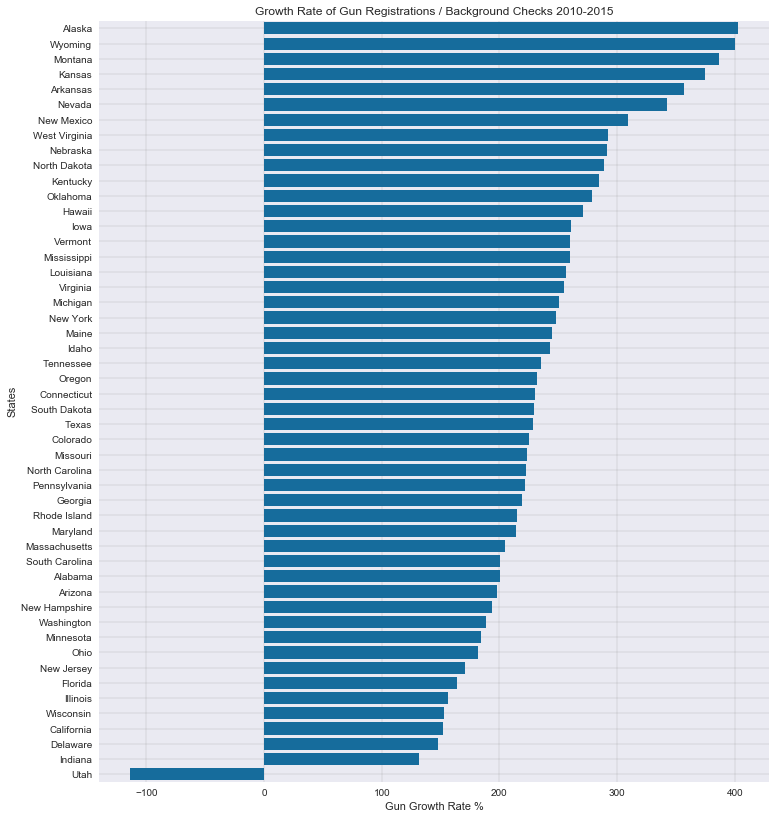

In [311]:
#Creating a horizontal bar chart using seaborn to visualize overall gun growth

fig, ax = plt.subplots(figsize=(12,14))

sort_result = result.sort_values(ascending=False, by=['gun_growth_percent'])

sns.set_color_codes("colorblind")
sns.barplot(x="gun_growth_percent", y="state", data=sort_result, label="Total", color="b")

# Adding informative axis labels and gridlines
ax.set(title='Growth Rate of Gun Registrations / Background Checks 2010-2015', ylabel='States', xlabel="Gun Growth Rate %")
ax.grid(b=True, which='major', color='grey', linewidth=.2)
sns.despine(left=False, bottom=False)



One possible reason for the decline in the growth rate of guns and subsequent background checks in the state of Utah could be the state's [law](http://lawcenter.giffords.org/registration-of-firearms-in-utah/) relating to the registration of firearms:

>Utah does not require firearm owners to register their firearms.

>Utah prohibits the Criminal Investigations and Technical Services Division of the Department of Public Safety, which performs criminal history background checks before all firearm transfers, from maintaining any records of a background check for longer than 20 days from the date of the dealer’s request for the background check, if the Division determines that the individual receiving the firearm is not prohibited from purchasing, possessing, or transferring the firearm under state or federal law.

The non-availability of this data could be the reason for the decline. Further ivestigation is necessary for a conclusive analysis. 

## Q5. How many back ground checks have been conducted since November, 1998 in every state?

In this straight forward question, we will calculate the cumulative number of checks conducted in every state since 1998.

In [312]:
# Calculating the total number of permit checks by state since 1998 
checks_by_state = gun_clean.groupby('state')['totals'].sum().reset_index().sort_values(ascending=False, by='totals')
# Displaying total checks by state
checks_by_state


,state,totals
18,Kentucky,29762434.0
46,Texas,19435186.0
4,California,19014063.0
14,Illinois,15471534.0
40,Pennsylvania,13133876.0
9,Florida,11695777.0
37,Ohio,8462744.0
35,North Carolina,7777689.0
15,Indiana,7737172.0
45,Tennessee,7311293.0


As is apparent in this chart and the graph below, Kentucky has the most number of background checks - i.e. **29,762,434** - since 1998. The state is known to have the least restrictive gun control laws compared to other states. In a summary of gun laws in Kentucky, you do not need a state permit to purchase, you do not need to register your firearm, there is no assault weapon law, magazine capacity restriction, and an owner license is not required. Background checks for for private sales are not required as well. The concealed carry laws have become more lax as well. 

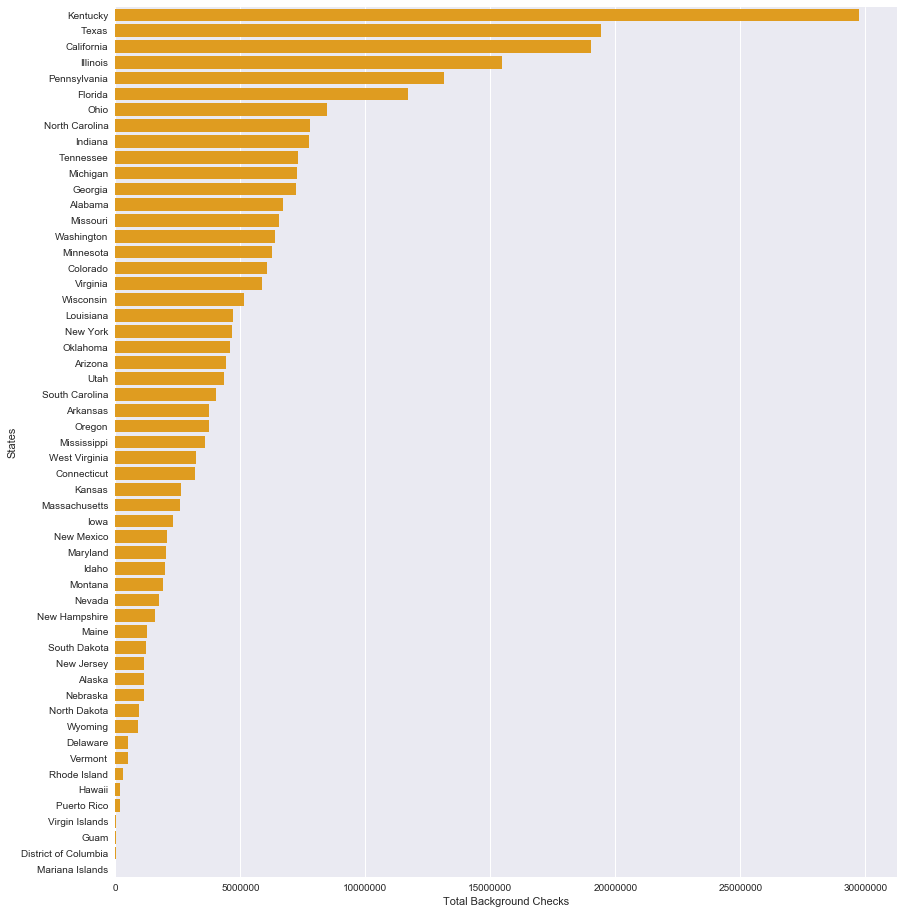

In [313]:
fig, ax = plt.subplots(figsize=(14,16))

sns.set_color_codes("colorblind")
sns.barplot(x="totals", y="state", data=checks_by_state, label="Total", color="orange")


# Adding informative axis labels and gridlines
ax.set(ylabel='States', xlabel="Total Background Checks")
#ax.grid(b=True, which='major', color='grey', linewidth=.2)
sns.despine(left=False, bottom=False)

#Removing exponentiation
ax.get_xaxis().get_major_formatter().set_scientific(False)

## Conclusions

During the course of this analysis, we got to see a picture of the presence of guns in the American society. It was clear from the outset that background checks are not the final indicator for gun sales. However, we were able to observe certain trends in background checks and gun ownership in the U.S. Furthermore:

1. As noted in the exploratory data analysis section of this report, background checks can give you an idea of gun sale activity, but a one-to-one comparison cannot be made. Thus, no estimates of gun sales were made.

2. From the visualizations, we can observe the steady increase in background checks for guns since 1998. The spikes in December are likely due to Black Friday sales. Spikes that do not happen in December could be due to calls for new gun restrictions or a host of other social factors and variables.

3. Kentucy is the state having the highest amount of checks and guns per capital in the U.S., while Alaska and Wyoming have shown the highest growth in gun registrations and background checks.

4. There seems to be no direct correlation between the number of veterans in a state and the amount of guns per capita. But there are a number of factors relating to data collection which may have had an effect on this outcome.

### Sources:

[National Shooting Sports Foundation](https://www.nssf.org/)

[US National Library of Medicine - National Institutes of Health: Study - Firearm ownership among American veterans(2015)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5735043/)

[The Guardian Article](https://www.theguardian.com/business/2015/dec/02/gun-sales-hit-new-record-on-black-friday-at-roughly-two-a-second)